# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [53]:
output_data_file=pd.read_csv("cities.csv")

output_data_file.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print city count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [55]:
#Creating a dataframe with city names
df=pd.DataFrame({"City":cities})
df["Cloudiness"]=""
df["Country"]=""
df["Date"]=""
df["Humidity"]=""
df["Lat"]=""
df["Lng"]=""
df["Max Temp"]=""
df["Wind Speed"]=""
df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mwene-ditu,,,,,,,,
1,anadyr,,,,,,,,
2,ueki,,,,,,,,
3,paamiut,,,,,,,,
4,estevan,,,,,,,,


In [56]:
#Perform a weather check on each city using a series of successive API calls.
base_url="http://api.openweathermap.org/data/2.5/weather"
params={"appid":weather_api_key}
for index,row in df.iterrows():
    params["q"] = row['City']
    try:
        print(f"Retrieving Record {index}: {row['City']}.")
        response=requests.get(base_url,params=params).json()
    except:
        print("Missing field/result... skipping")

Retrieving Record 0: mwene-ditu.
Retrieving Record 1: anadyr.
Retrieving Record 2: ueki.
Retrieving Record 3: paamiut.
Retrieving Record 4: estevan.
Retrieving Record 5: kapaa.
Retrieving Record 6: quatre cocos.
Retrieving Record 7: provideniya.
Retrieving Record 8: antofagasta.
Retrieving Record 9: mataura.
Retrieving Record 10: severo-kurilsk.
Retrieving Record 11: nabire.
Retrieving Record 12: tsihombe.
Retrieving Record 13: hobart.
Retrieving Record 14: albany.
Retrieving Record 15: buala.
Retrieving Record 16: jamestown.
Retrieving Record 17: busselton.
Retrieving Record 18: anchorage.
Retrieving Record 19: tecate.
Retrieving Record 20: atuona.
Retrieving Record 21: dikson.
Retrieving Record 22: taolanaro.
Retrieving Record 23: hermanus.
Retrieving Record 24: seoul.
Retrieving Record 25: udachnyy.
Retrieving Record 26: aklavik.
Retrieving Record 27: angoram.
Retrieving Record 28: new norfolk.
Retrieving Record 29: arraial do cabo.
Retrieving Record 30: norman wells.
Retrieving Rec

Retrieving Record 253: meyungs.
Retrieving Record 254: ust-maya.
Retrieving Record 255: bafq.
Retrieving Record 256: katangli.
Retrieving Record 257: camacha.
Retrieving Record 258: mrirt.
Retrieving Record 259: saskylakh.
Retrieving Record 260: inhambane.
Retrieving Record 261: corrente.
Retrieving Record 262: perth.
Retrieving Record 263: champerico.
Retrieving Record 264: tidore.
Retrieving Record 265: roros.
Retrieving Record 266: srednekolymsk.
Retrieving Record 267: asau.
Retrieving Record 268: suleja.
Retrieving Record 269: saint-augustin.
Retrieving Record 270: port moresby.
Retrieving Record 271: saurimo.
Retrieving Record 272: nanortalik.
Retrieving Record 273: adrar.
Retrieving Record 274: merauke.
Retrieving Record 275: george town.
Retrieving Record 276: tirlyanskiy.
Retrieving Record 277: jos.
Retrieving Record 278: mount isa.
Retrieving Record 279: mahebourg.
Retrieving Record 280: samarai.
Retrieving Record 281: lousa.
Retrieving Record 282: comodoro rivadavia.
Retrievi

Retrieving Record 503: ouesso.
Retrieving Record 504: takapau.
Retrieving Record 505: mabaruma.
Retrieving Record 506: san cristobal.
Retrieving Record 507: otradnoye.
Retrieving Record 508: mergui.
Retrieving Record 509: muzhi.
Retrieving Record 510: klaksvik.
Retrieving Record 511: karwar.
Retrieving Record 512: urumqi.
Retrieving Record 513: san lucas.
Retrieving Record 514: nguiu.
Retrieving Record 515: pareora.
Retrieving Record 516: jensen beach.
Retrieving Record 517: saint-louis.
Retrieving Record 518: vigrestad.
Retrieving Record 519: kampot.
Retrieving Record 520: treinta y tres.
Retrieving Record 521: acarau.
Retrieving Record 522: olinda.
Retrieving Record 523: mandalgovi.
Retrieving Record 524: kungurtug.
Retrieving Record 525: pemba.
Retrieving Record 526: marsh harbour.
Retrieving Record 527: toliary.
Retrieving Record 528: dingtao.
Retrieving Record 529: kucevo.
Retrieving Record 530: mahanje.
Retrieving Record 531: alice springs.
Retrieving Record 532: kamaishi.
Retrie

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
#Converting to dataframe:
base_url="http://api.openweathermap.org/data/2.5/weather"
params={"appid":weather_api_key}
for index,row in df.iterrows():
    params["q"]=row['City']
    response=requests.get(base_url,params=params).json()
    try:
        df.loc[index,"Cloudiness"]=response["clouds"]["all"]
        df.loc[index,"Country"]=response["sys"]["country"]
        df.loc[index,"Date"]=response["dt"]
        df.loc[index,"Humidity"]=response["main"]["humidity"]
        df.loc[index,"Lat"]=response["coord"]["lat"]
        df.loc[index,"Lng"]=response["coord"]["lon"]
        df.loc[index,"Max Temp"]=response["main"]["temp_max"]
        df.loc[index,"Wind Speed"]=response["wind"]["speed"]
    except (KeyError,IndexError):
        print("Missing field/result... skipping.")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [58]:
#Remove empty cells and export 
df_clean=df.dropna(how='any')
nan_value=float("NaN")
df_clean.replace("",nan_value,inplace=True)
df_clean=df_clean.dropna(how='any')

#Convert to Kelvin
df_clean["Max Temp"]=df_clean["Max Temp"]*1.8-459.67
df_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

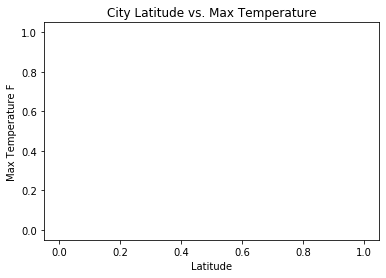

In [40]:
#Correlation between Latitude and Max Temp:
plt.scatter(df_clean.Lat,df_clean["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature F")
plt.title("City Latitude vs. Max Temperature")
#where is my chart

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

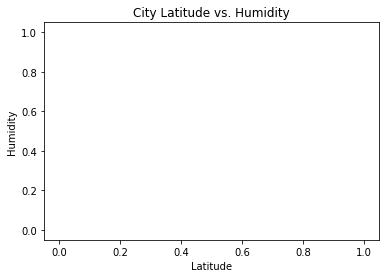

In [36]:
#Correlation between Latitude and Humidity:
plt.scatter(df_clean.Lat,df_clean.Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

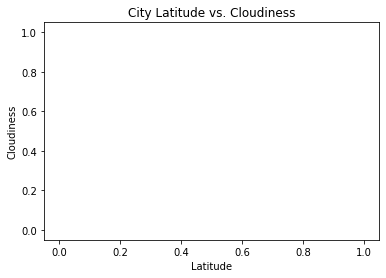

In [37]:

#Correlation between Latitude and Humidity:
plt.scatter(df_clean.Lat,df_clean.Cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

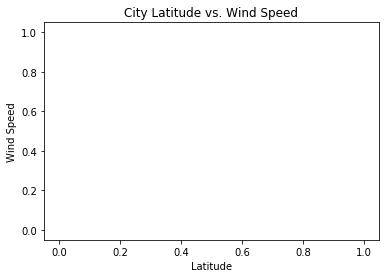

In [38]:
#Correlation between Latitude and Humidity:
plt.scatter(df_clean.Lat,df_clean["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


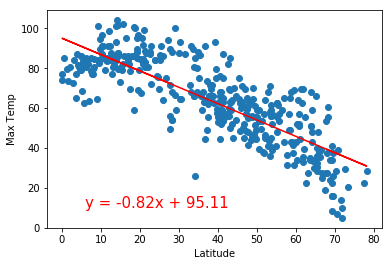

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


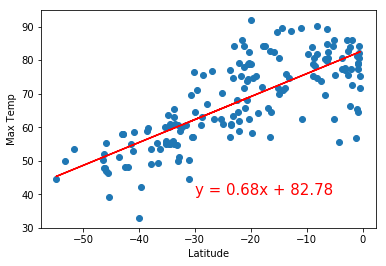

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


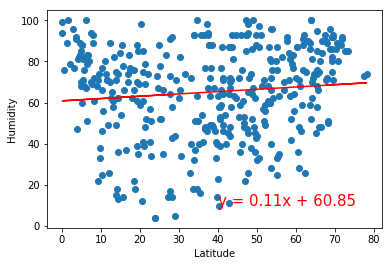

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


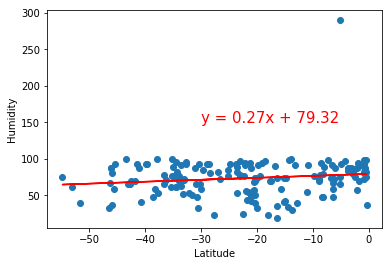

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


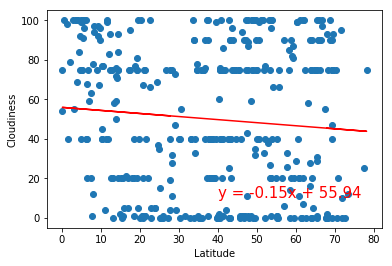

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


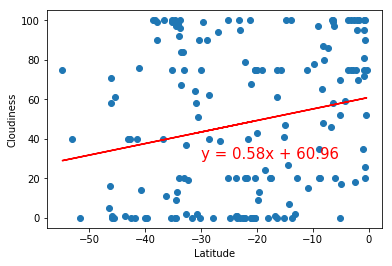

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


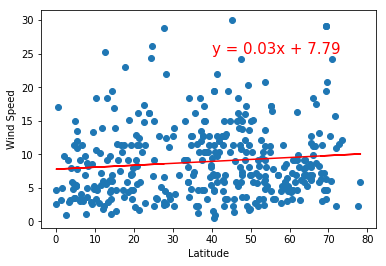

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


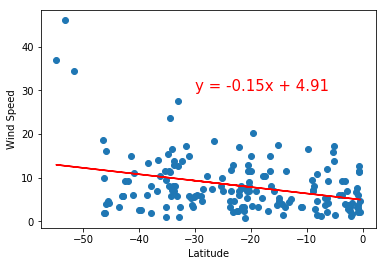